# Binary classifier to predict HAP versus VAP

In [1]:
# Import Statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from xgboost import XGBClassifier
import shap
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, average_precision_score

cwd = Path.cwd()
print(cwd)
datasets = cwd / '../results/tax_classification_out/abundance_matrices'
results = cwd / '../results/ML_out'

/mnt/c/git_repos/pneumonia/ML_scripts


/home/cednotsed/miniconda3/envs/mashin/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data Preprocessing

### Load data

In [54]:
col_name = 'hap_vap2'


In [55]:
 # Response
 y = merged_filt.loc[:, col_name].copy()

 # Features
 X = merged_filt.loc[:, ~merged_filt.keys().isin(meta.keys())].copy()

In [60]:
 # Binary encode y
 y.loc[y == g1] = 1
 y.loc[y == g2] = 0
 y = y.astype('int')

ValueError: invalid literal for int() with base 10: 'V-HAP'

In [58]:
 pos = len(y[y == 1])
 neg = len(y[y == 0])
 split_sizes = pd.DataFrame({g1: [pos - int(pos / n_splits), int(pos / n_splits)],
                             g2: [neg - int(neg / n_splits), int(neg / n_splits)]}, index=['Train fold', 'Test fold']) 

In [59]:
split_sizes

,HAP,VAP
Train fold,0,0
Test fold,0,0


In [66]:
meta.hap_vap2.value_counts()
# meta.hap_vap_cap.value_counts()

hap_vap2
VAP              148
NV-HAP            56
V-HAP             52
Water control     48
Name: count, dtype: int64

In [56]:
 raw_df = pd.read_csv(datasets / f'RA.G.zeroed.decontam.{threshold}.csv')
 meta = pd.read_csv(cwd / "../data/metadata/parsed_patient_metadata.filt.csv")

 merged_df = raw_df.merge(meta, on='run_id', how='left')
 merged_filt = merged_df.loc[merged_df[col_name].isin([g1, g2]), :]

In [57]:
merged_filt

,run_id,Pseudomonas,Corynebacterium,Streptococcus,Serratia,Klebsiella,Salmonella,Stenotrophomonas,Alcaligenes,Haemophilus,...,curetis_validity,curetis_organism,curetis_resistance,hap_vap2,ventilation,n_reads,median_read_length,sdev_read_length,microbial_reads,high_microbe_count
0,10_2,0.573426,0.013248,0.413326,0.0,0.000000,0.000000,0.00000,0.00000,0.0,...,Valid,Pseudomonas aeruginosa (+++),shv,VAP,True,165967,2100.0,745.702017,152597,True
2,10_4,0.000000,0.000000,0.000000,0.0,0.993836,0.006164,0.00000,0.00000,0.0,...,Valid,Klebsiella pneumoniae (+++);Pseudomonas aerugi...,CTX-M\nshv\nsul1\ntem,VAP,True,148719,2412.0,811.157062,146934,True
3,10_5,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.00000,0.00000,0.0,...,Valid,Escherichia coli (+++);Klebsiella pneumoniae (...,shv\ntem\nE. coli gyrA83\nE. coli gyrA87\nP. a...,VAP,True,141513,2189.0,805.841245,113265,True
4,10_6,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.99387,0.00613,0.0,...,Valid,Stenotrophomonas maltophilia (+++),Not detected,VAP,True,153824,2229.0,815.686923,146062,True
7,11_8,0.428853,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.0,...,Valid,Pneumocystis jirovecii (++),Not detected,VAP,True,177498,2431.0,852.424448,28762,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,8_6,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.0,...,Valid,Escherichia coli (+),sul1,VAP,True,2882,3169.0,1062.191180,2331,True
217,9_1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.0,...,Valid,Staphylococcus aureus (++),Not detected,VAP,True,332789,2229.0,864.430847,329903,True
220,9_4,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.0,...,Valid,Staphylococcus aureus (++),mecA,VAP,True,298397,2706.0,869.932758,17874,True
221,9_5,0.538721,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.00000,0.0,...,Valid,Negative,Not detected,VAP,True,900,2921.5,908.892809,701,True


In [2]:
raw_df = pd.read_csv(datasets / 'RA.G.zeroed.decontam.2.csv')
meta = pd.read_csv(cwd / "../data/metadata/parsed_patient_metadata.filt.csv")
# display(raw_df)
# display(meta)

merged_df = raw_df.merge(meta, on='run_id', how='left')
merged_filt = merged_df.loc[merged_df.hap_vap_cap.isin(['HAP', 'VAP']), :]

# Response
y = merged_filt.loc[:, 'hap_vap_cap'].copy()

# Features
X = merged_filt.loc[:, ~merged_filt.keys().isin(meta.keys())].copy()

# Rename features
X.columns = X.columns.str.replace('[^A-Za-z0-9]+', '_') 
print(X.shape)
print(y.shape)

# Binary encode y
y.loc[y == 'HAP'] = 1
y.loc[y == 'VAP'] = 0
y = y.astype('int')


(216, 155)
(216,)


In [3]:
n_splits = 5

pos = len(y[y == 1])
neg = len(y[y == 0])
split_sizes = pd.DataFrame({'HAP': [pos - int(pos / n_splits), int(pos / n_splits)], 
                           'VAP': [neg - int(neg / n_splits), int(neg / n_splits)]}, index=['Train fold', 'Test fold'])

display(split_sizes)

# Get negative to positive ratio
ratio = sum(y == 0) / sum(y == 1)

,HAP,VAP
Train fold,72,102
Test fold,17,25


In [21]:
def optimise_evaluate(X, y):
    np.random.seed(66)
    ratio = sum(y == 0) / sum(y == 1)
    
    # Hyperparemeter Optimisation using grid search (F1)
    model = XGBClassifier()
    n_estimators = range(100, 500, 100)
    max_depth = range(1, 2, 1)
    gamma = np.linspace(0.1, 3, 10)
    colsample_bytree = np.linspace(0.5, 1, 10)
    
    param_grid = dict(max_depth=max_depth, 
                      n_estimators=n_estimators, 
                      colsample_bytree=colsample_bytree,
                      gamma=gamma,
                     n_jobs=[1])
    
    inner_cv = StratifiedKFold(n_splits=n_splits, shuffle=True)
    outer_cv = StratifiedKFold(n_splits=n_splits, shuffle=True)

    # Inner CV
    model = GridSearchCV(model, 
                         param_grid, 
                         scoring='f1',
                         n_jobs=6, 
                         cv=inner_cv, 
                         verbose=1)

    model.fit(X, y)
    best_params = model.best_params_
    print(best_params)

    # Custom metrics
    precision = make_scorer(precision_score, average='binary')
    recall = make_scorer(recall_score, average='binary')
    f1 = make_scorer(f1_score, average='binary')
    auprc = make_scorer(average_precision_score, average=None)
    
    scoring = {'precision': precision, 
               'recall': recall, 
               'AUROC': 'roc_auc',
               'F1': f1}

    # Outer CV
    outer_results = cross_validate(model, X=X, y=y, cv=outer_cv, scoring=scoring, n_jobs=4)
    outer_results = pd.DataFrame(outer_results).mean()[['test_precision', 'test_recall', 'test_F1', 'test_AUROC']]

    return outer_results, best_params


In [22]:
raw_results, raw_params = optimise_evaluate(X, y)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
{'colsample_bytree': 0.6666666666666666, 'gamma': 0.1, 'max_depth': 1, 'n_estimators': 400, 'n_jobs': 1}
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 400 candidates, totalling 2000 fits


In [26]:
pd.DataFrame(raw_results).transpose()

,test_precision,test_recall,test_F1,test_AUROC
0,0.495882,0.394771,0.425959,0.640203


In [27]:
g1 = 'HAP'
g2 = 'VAP'
threshold = 1

In [37]:
shap_values

array([[-0.17141858, -0.02464159,  0.01172158, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03001044,  0.00271965, -0.06202972, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03001044,  0.00271965, -0.06202972, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.05293511,  0.00366133, -0.07592897, ...,  0.        ,
         0.        ,  0.        ],
       [-0.13108173,  0.00264948, -0.06062715, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.03653902,  0.00310767,  0.00855119, ...,  0.        ,
         0.        ,  0.        ]])

In [44]:
 final_model = XGBClassifier(**raw_params)
 final_model.fit(X=X, y=y)

 explainer = shap.TreeExplainer(final_model, model_output='probability', data=X)
 shap_values = explainer.shap_values(X)

 # # Parse SHAP values
 shap_df = pd.DataFrame(shap_values, columns=X.columns).add_suffix('.shap')
 merged = pd.concat([X, shap_df], axis=1)

In [47]:
results_df = pd.DataFrame(raw_results).transpose()
param_df = pd.DataFrame(raw_params, index=[0])
param_df['g1'] = g1
param_df['g2'] = g2
param_df['threshold'] = threshold

final_results = pd.concat([param_df, results_df], axis=1)
display(final_results)

,colsample_bytree,gamma,max_depth,n_estimators,n_jobs,g1,g2,threshold,test_precision,test_recall,test_F1,test_AUROC
0,0.666667,0.1,1,400,1,HAP,VAP,1,0.495882,0.394771,0.425959,0.640203


In [6]:
print(raw_params)
res_df = pd.DataFrame(raw_results).transpose()
res_df.to_csv(results / 'raw_results/HAP_VAP.csv', index=False)

{'colsample_bytree': 0.2, 'max_depth': 4, 'n_estimators': 300}


In [7]:
# # From XGboost_external_validation notebook
# raw_params = {'subsample': 0.8, 'scale_pos_weight': 0.9043478260869565, 'n_estimators': 220, 'max_depth': 4, 'gamma': 0.1, 'colsample_bytree': 0.1473684210526316}
# raw_model = XGBClassifier(**raw_params)
# raw_model.fit(X, y)

# explainer_raw = shap.TreeExplainer(raw_model, feature_pertubation='interventional', model_output='probability', data=X)
# shap_raw = explainer_raw.shap_values(X)

In [52]:
 merged.to_csv(results / f'shap_out/{g1}.{g2}.{threshold}.shap.csv', index=False)
 final_results.to_csv(results / f'results_out/{g1}.{g2}.{threshold}.results.csv', index=False)

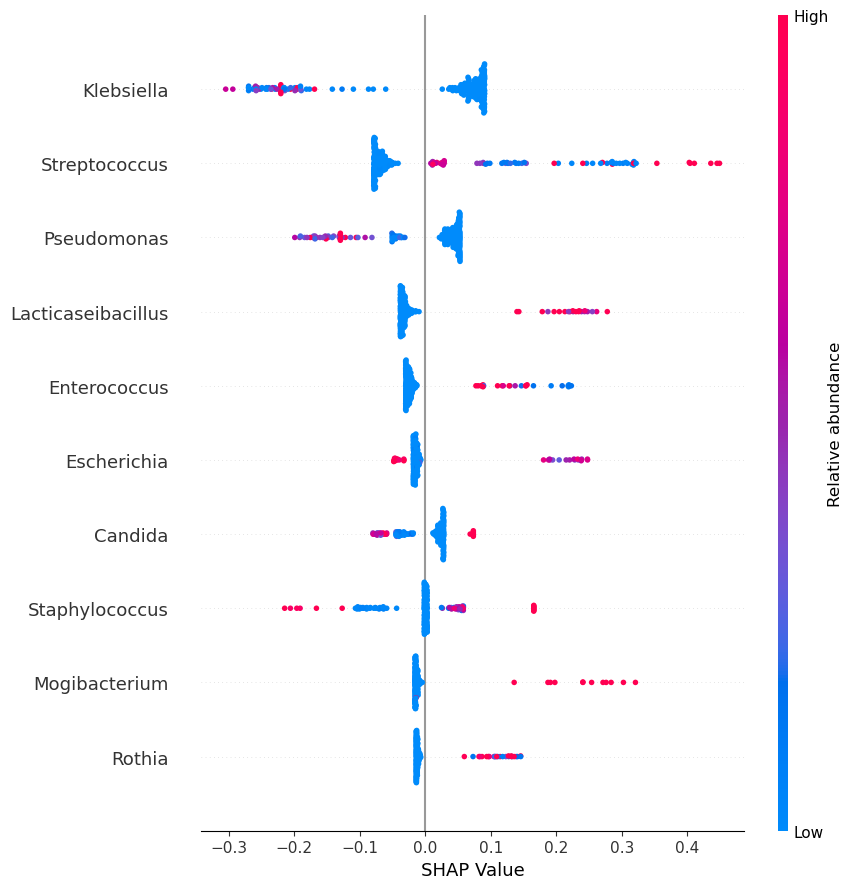

In [53]:
 shap.summary_plot(shap_values, X,
                   show=False,
                   plot_size=(9, 9),
                   color_bar_label='Relative abundance',
                   max_display=10)
 fig, ax = plt.gcf(), plt.gca()
 ax.set_xlabel('SHAP Value')
 plt.savefig(results / f'beeswarm_out/{g1}.{g2}.{threshold}.pdf', dpi=600, format='pdf')

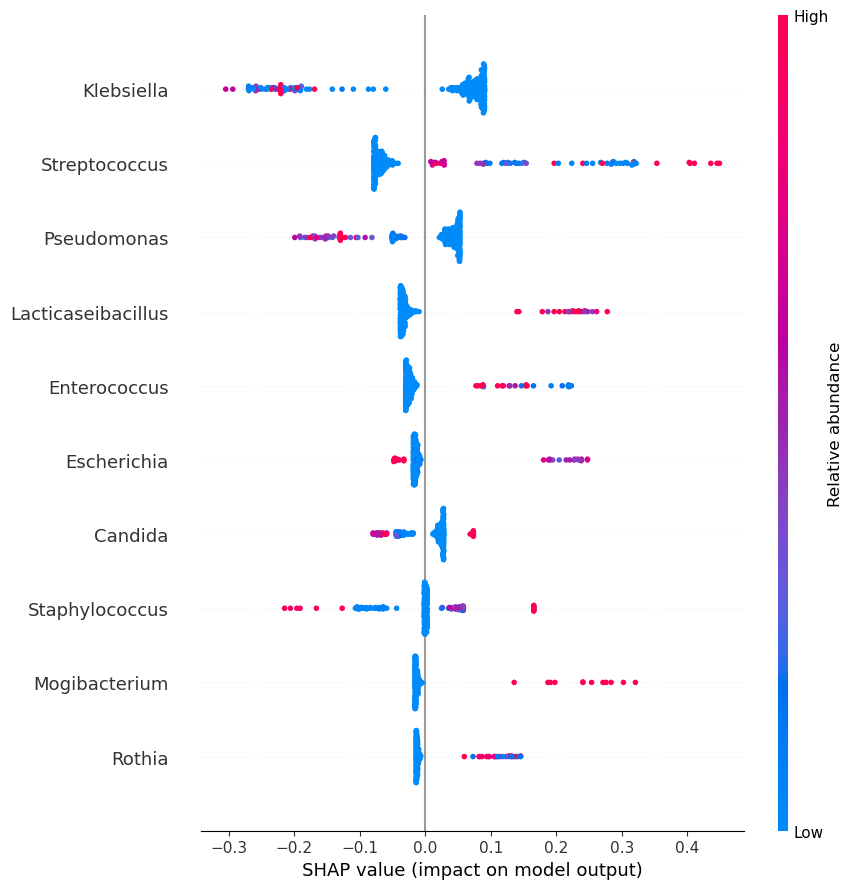

In [50]:
 final_model = XGBClassifier(**raw_params)
 final_model.fit(X=X, y=y)

 explainer = shap.TreeExplainer(final_model, feature_perturbation='interventional', model_output='probability', data=X)
 shap_values = explainer.shap_values(X)

 # Parse SHAP values
 shap_df = pd.DataFrame(shap_values, columns=X.columns).add_suffix('.shap')
 merged = pd.concat([X, shap_df], axis=1)

 shap.summary_plot(shap_values, X,
                   show=False,
                   plot_size=(9, 9),
                   color_bar_label='Relative abundance',
                   max_display=10)
 fig, ax = plt.gcf(), plt.gca()

In [48]:
# pre_model = XGBClassifier(**raw_params)
# pre_model.fit(X=X, y=y)

# pre_explainer = shap.TreeExplainer(pre_model, feature_pertubation='interventional', model_output='probability', data=X)
# shap_pre = pre_explainer.shap_values(X)

shap.summary_plot(shap_pre, X, 
                  show=False, 
                  plot_size=(9, 9), 
                  color_bar_label='Relative abundance',
                  max_display=25)
fig, ax = plt.gcf(), plt.gca()
ax.set_xlabel('SHAP Value')
# plt.savefig(results / 'shap_plot.png', dpi=600, format='png')

NameError: name 'shap_pre' is not defined